<a href="https://colab.research.google.com/github/Vaishag7/DL_Bootcamp/blob/main/Image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/F._C._Kiærskou_-_Coastal_scenery_with_a_farm_and_ships_at_the_sea.jpg'

In [ ]:
img = cv2.imread(path,1)

In [ ]:
img.shape

(2912, 3973, 3)

In [ ]:
from google.colab.patches import cv2_imshow
#cv2_imshow(img) ; 
#cv2.waitKey(0) ; 
#cv2.destroyAllWindows()


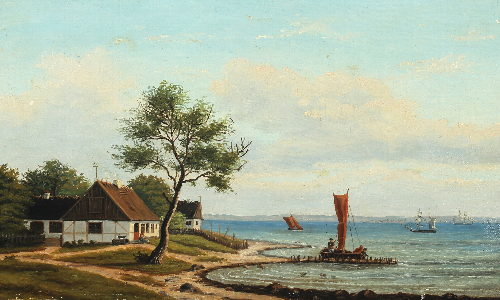

In [ ]:
resized_image = cv2.resize(img, (500,300))
cv2_imshow(resized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

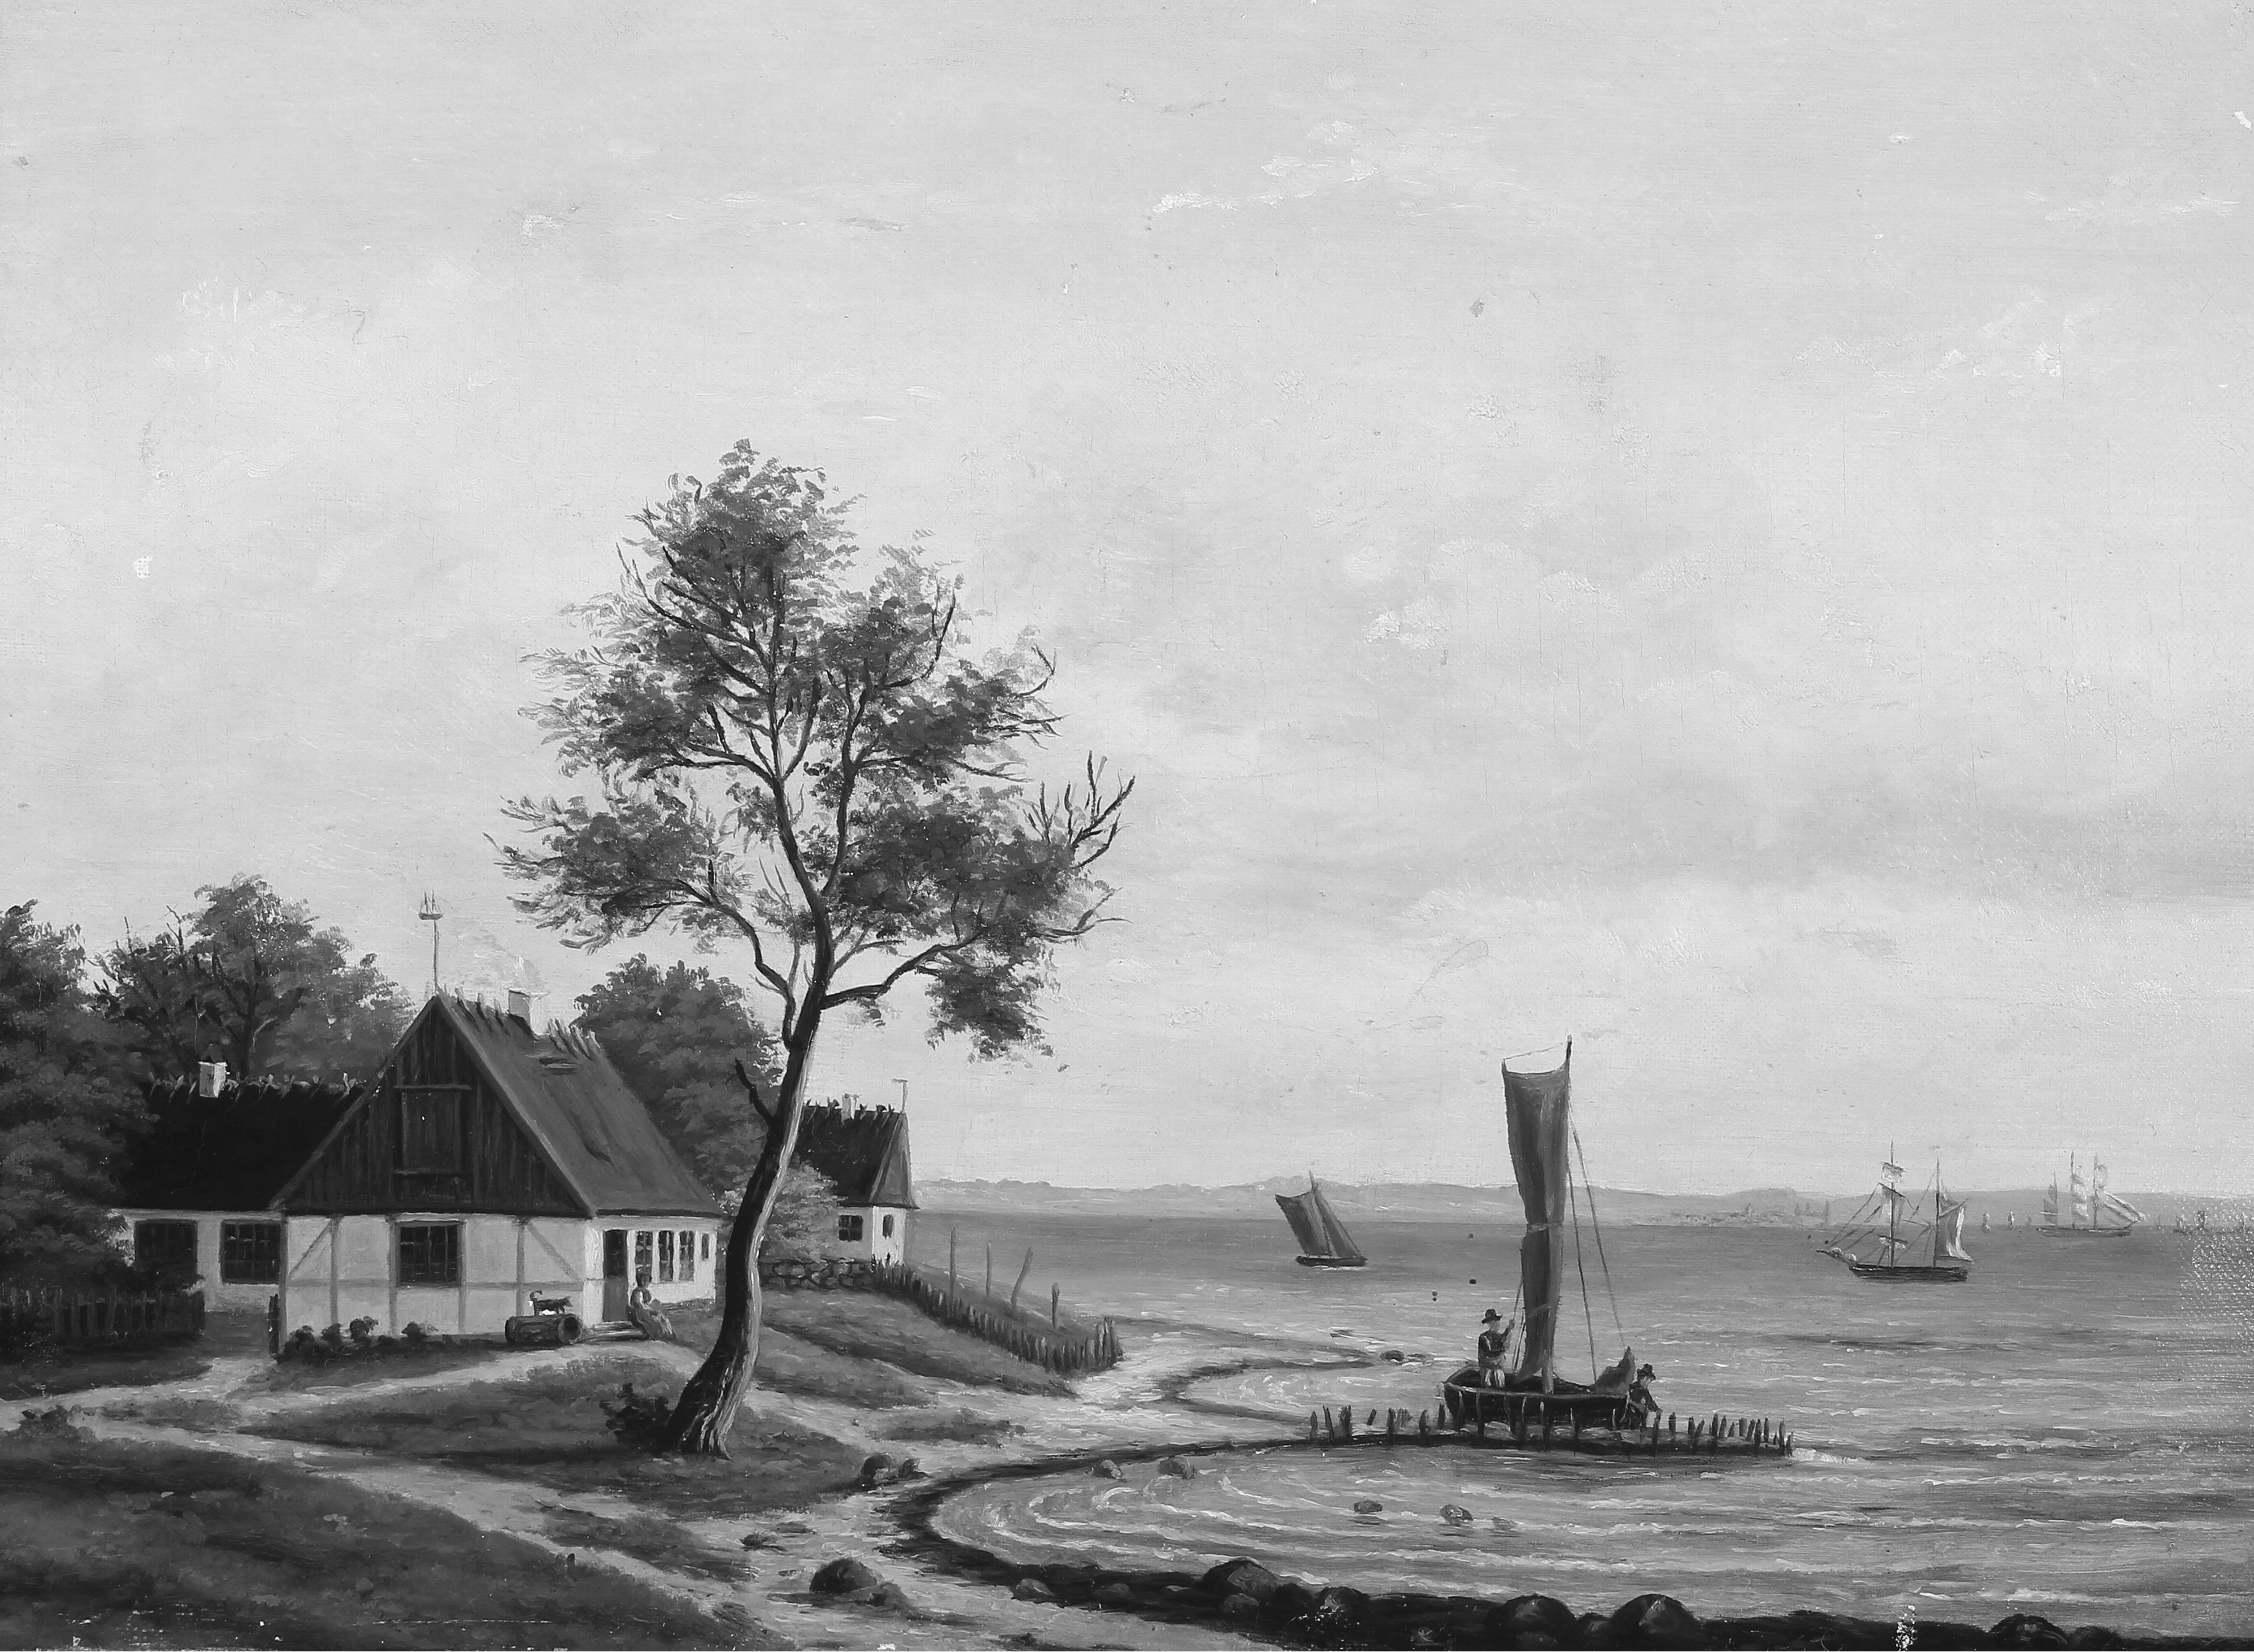

In [ ]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
cv2_imshow(gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
print(img)

[[[213 219 184]
  [209 215 180]
  [209 215 180]
  ...
  [207 221 187]
  [208 222 188]
  [208 221 189]]

 [[211 217 182]
  [209 215 180]
  [210 216 181]
  ...
  [207 221 187]
  [208 222 188]
  [209 222 190]]

 [[213 220 185]
  [213 220 185]
  [215 222 187]
  ...
  [206 219 187]
  [209 222 190]
  [208 223 191]]

 ...

 [[ 30  59  74]
  [ 31  60  75]
  [ 31  60  75]
  ...
  [ 29  31  32]
  [ 30  32  33]
  [ 30  32  33]]

 [[ 85 103 114]
  [ 86 104 115]
  [ 86 104 115]
  ...
  [ 78  80  80]
  [ 79  81  81]
  [ 79  81  81]]

 [[224 236 246]
  [226 238 248]
  [226 238 248]
  ...
  [238 240 240]
  [238 240 240]
  [238 240 240]]]


In [ ]:
rimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#cv2_imshow(rimg)
#cv2.waitKey(0)
#cv2.destroyAllWindows()


In [ ]:
average_color_per_row = np.average(img, axis=0)
average_per_row = np.average(average_color_per_row, axis=0)
average_per_row = np.uint8(average_per_row) ; 


array([155, 175, 168], dtype=uint8)

In [25]:
from google.colab import files
uploaded = files.upload()

Saving Brad_Pitt_(15570818296).jpg to Brad_Pitt_(15570818296).jpg


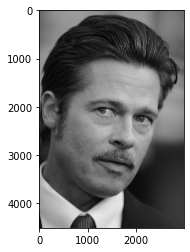

In [27]:
img = cv2.resize(img, (500,300)); 
img_gray = cv2.imread('Brad_Pitt_(15570818296).jpg',0)
plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_GRAY2RGB))

In [29]:
grad_img = np.asarray(img_gray)
grad_img

array([[ 97,  97,  97, ..., 100, 104, 106],
       [ 98, 100, 102, ..., 101, 104, 106],
       [ 97,  99, 100, ..., 104, 104, 103],
       ...,
       [ 13,  13,  14, ...,  52,  52,  52],
       [ 13,  13,  13, ...,  53,  53,  52],
       [ 14,  15,  14, ...,  53,  53,  51]], dtype=uint8)

In [32]:
h,w = img_gray.shape[:2]
print(h,w)

4504 2988


In [ ]:
for i in range (0,h):
  for j in range(0,w-1):
   min_pix_val = min(img_gray[i][j], img_gray[i][j+1]) 
   if (min_pix_val==img_gray[i][j+1]):
     temp_arr = img_gray[i][j]-img_gray[i][j+1]
   else:
     temp_arr = img_gray[i][j+1]-img_gray[i][j]

  grad_img[i,j] = temp_arr



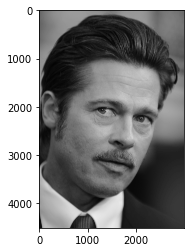

In [33]:
from PIL import Image
gradient_img = Image.fromarray(grad_img)

plt.imshow(gradient_img, cmap='gray')


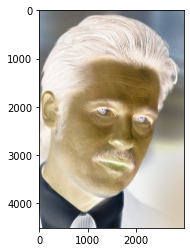

In [34]:
img = cv2.imread('Brad_Pitt_(15570818296).jpg')
B,G,R = cv2.split(img) ; 
B[:] = [255-x for x in B] #inverting blue
G[:] = [255-x for x in G] #inverting green
R[:] = [255-x for x in R] 

neg_img = cv2.merge((B,G,R))
plt.imshow(neg_img)

In [36]:
from google.colab import files
uploaded = files.upload()

Saving Upstate_New_York_Fall_Colors_-_Autumn_at_Church_Pond,_Paul_Smiths_(30273943696).jpg to Upstate_New_York_Fall_Colors_-_Autumn_at_Church_Pond,_Paul_Smiths_(30273943696).jpg


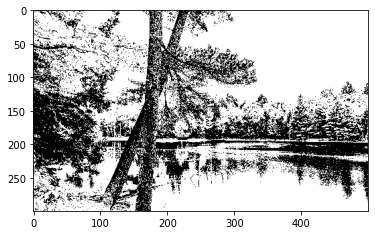

In [37]:
gray_img = cv2.imread('Upstate_New_York_Fall_Colors_-_Autumn_at_Church_Pond,_Paul_Smiths_(30273943696).jpg',0)
_, threshold_img = cv2.threshold(gray_img, 60, 255, cv2.THRESH_BINARY)

threshold_img = cv2.cvtColor(threshold_img, cv2.COLOR_GRAY2RGB)
threshold_img = cv2.resize(threshold_img, (500,300))
plt.imshow(threshold_img)

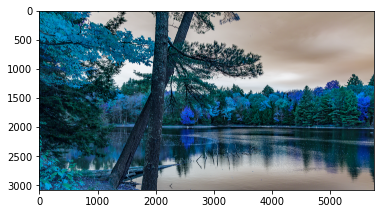

In [38]:
blue_min = np.array([85, 60, 60], np.uint8)
blue_max= np.array([150, 255, 255], np.uint8)
upstate = cv2.imread('Upstate_New_York_Fall_Colors_-_Autumn_at_Church_Pond,_Paul_Smiths_(30273943696).jpg')
upstate_hsv = cv2.cvtColor(upstate, cv2.COLOR_RGB2HSV) 
plt.imshow(cv2.cvtColor(upstate_hsv, cv2.COLOR_HSV2RGB))

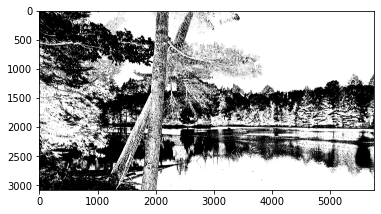

In [39]:
mask_inverse = cv2.inRange(upstate_hsv, blue_min, blue_max)
mask = cv2.bitwise_not(mask_inverse)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB))